In [7]:
from utils import *

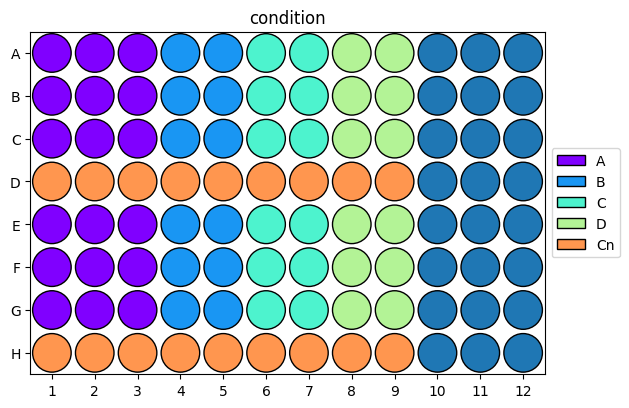

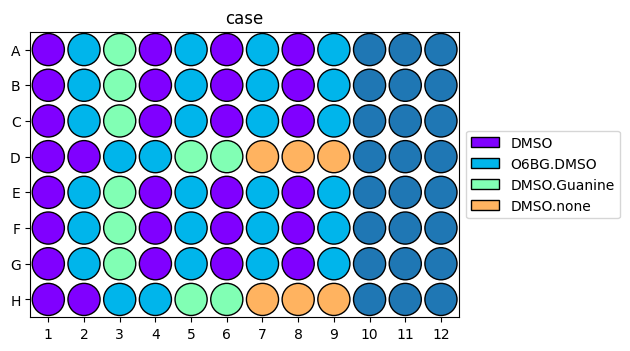

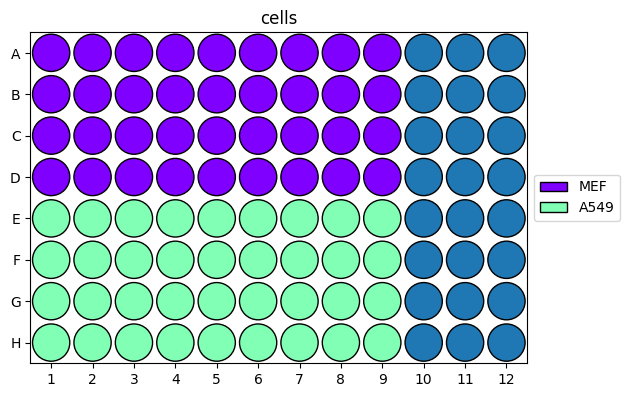

In [13]:
rd.plot.plot_well_metadata(rd.rootdir/'metadata'/'infection_metadata.yaml')

In [26]:
basepath = rd.datadir /'instruments'/'data'/'attune'/'adam'/'2023.07.20.JPT_infec1'/'single_cell_csvs'
cache_file = rd.rootdir / 'output' / 'df_cache.gzip'
if not cache_file.exists():
    data = rd.flow.load_groups_with_metadata(pd.DataFrame({
        'data_path': [basepath],
        'yaml_path': [rd.rootdir/'metadata'/'infection_metadata.yaml']
    }))
else:
    df = pd.read_parquet(cache_file)

In [25]:
data

,condition,case,cells,well,population,FSC-A,FSC-H,FSC-W,SSC-A,SSC-H,...,RL1-A,RL1-H,RL1-W,tagBFP-A,tagBFP-H,tagBFP-W,Halo-p53-A,Halo-p53-H,Halo-p53-W,Time
0,A,DMSO,MEF,A1,Singlets,335193,250633,102,22888,17344,...,50,35,0,9519,6619,54,97,85,0,0.002692
1,A,DMSO,MEF,A1,Singlets,562301,306778,122,73106,44124,...,62,48,0,4027,2317,43,229,159,0,0.020188
2,A,DMSO,MEF,A1,Singlets,359163,253817,113,29903,22494,...,-75,27,0,38,77,0,150,96,0,0.021534
3,A,DMSO,MEF,A1,Singlets,503667,298978,119,77262,49088,...,-4,69,0,4884,2568,49,209,155,0,0.034993
4,A,DMSO,MEF,A1,Singlets,500293,251673,122,118452,76616,...,19,45,0,1528,1104,11,1888,1558,24,0.087483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536651,Cn,DMSO.none,A549,H8,singlets,445636,276904,128,49151,33032,...,57,76,0,337,102,0,129,87,0,22.932400
536652,Cn,DMSO.none,A549,H8,singlets,345766,187797,150,102261,62058,...,86,123,0,1404,1004,3,774,449,0,22.940500
536653,Cn,DMSO.none,A549,H8,singlets,381616,216104,133,70409,43940,...,33,82,0,374,291,0,371,299,0,22.947500
536654,Cn,DMSO.none,A549,H8,singlets,509149,292095,140,75318,49658,...,53,87,0,260,176,0,216,144,0,23.009100


c:\Users\default.LAPTOP-PE8FD692\OneDrive\Documents\HIP-SAT\data_analysis\pJPT002_transfection\env\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


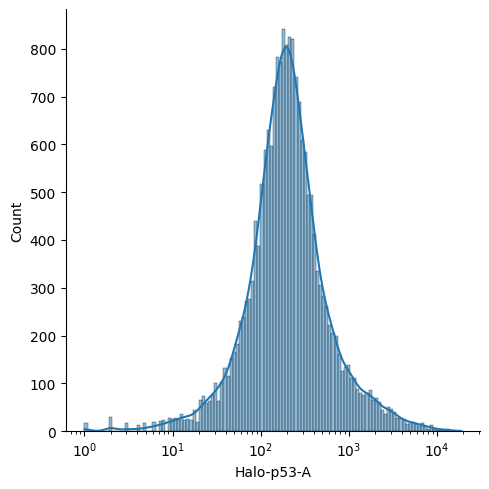

In [30]:
sns.displot(data=data[(data.condition == 'A') & (data.cells == 'MEF') & (data['Halo-p53-A'] > 0)], x = 'Halo-p53-A', log_scale=True, kde=True)

c:\Users\default.LAPTOP-PE8FD692\OneDrive\Documents\HIP-SAT\data_analysis\pJPT002_transfection\env\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


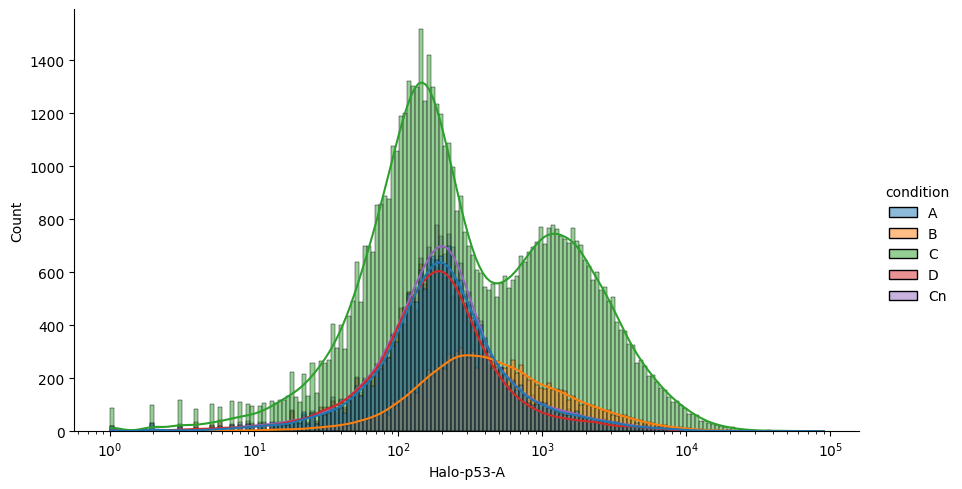

In [34]:
sns.displot(data=data[(data.cells == 'MEF') & (data['Halo-p53-A'] > 0)], x = 'Halo-p53-A', log_scale=True, kde=True, hue='condition', aspect=16/9)

c:\Users\default.LAPTOP-PE8FD692\OneDrive\Documents\HIP-SAT\data_analysis\pJPT002_transfection\env\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


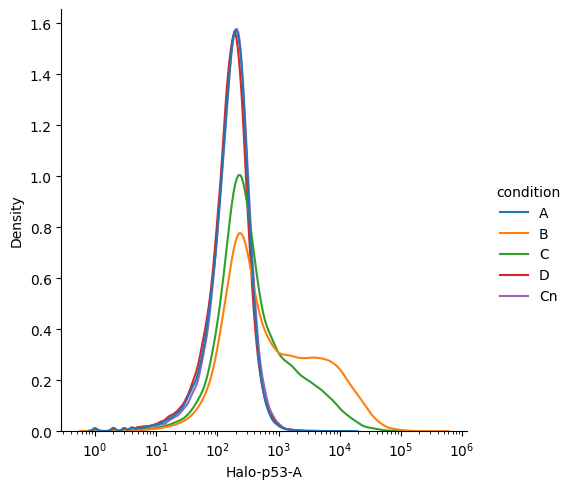

In [35]:
sns.displot(data=data[(data.cells == 'A549') & (data['Halo-p53-A'] > 0)], x = 'Halo-p53-A', log_scale=True, kind='kde', hue ='condition', common_norm = False)

c:\Users\default.LAPTOP-PE8FD692\OneDrive\Documents\HIP-SAT\data_analysis\pJPT002_transfection\env\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


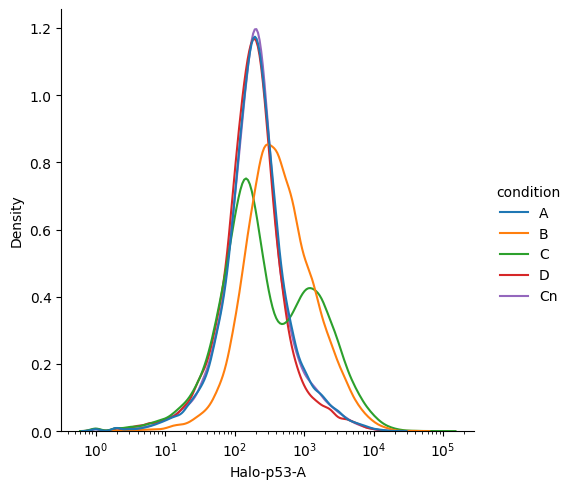

In [36]:
sns.displot(data=data[(data.cells == 'MEF') & (data['Halo-p53-A'] > 0)], x = 'Halo-p53-A', log_scale=True, kind='kde', hue ='condition', common_norm = False)

c:\Users\default.LAPTOP-PE8FD692\OneDrive\Documents\HIP-SAT\data_analysis\pJPT002_transfection\env\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


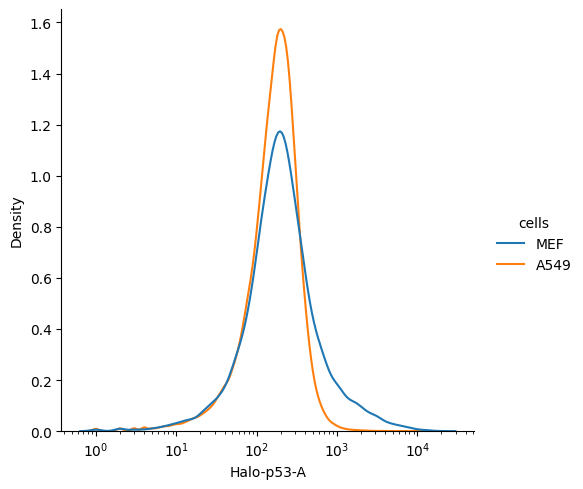

In [37]:
sns.displot(data=data[(data.condition == 'A') & (data['Halo-p53-A'] > 0)], x = 'Halo-p53-A', log_scale=True, kind='kde', hue ='cells', common_norm = False)

c:\Users\default.LAPTOP-PE8FD692\OneDrive\Documents\HIP-SAT\data_analysis\pJPT002_transfection\env\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


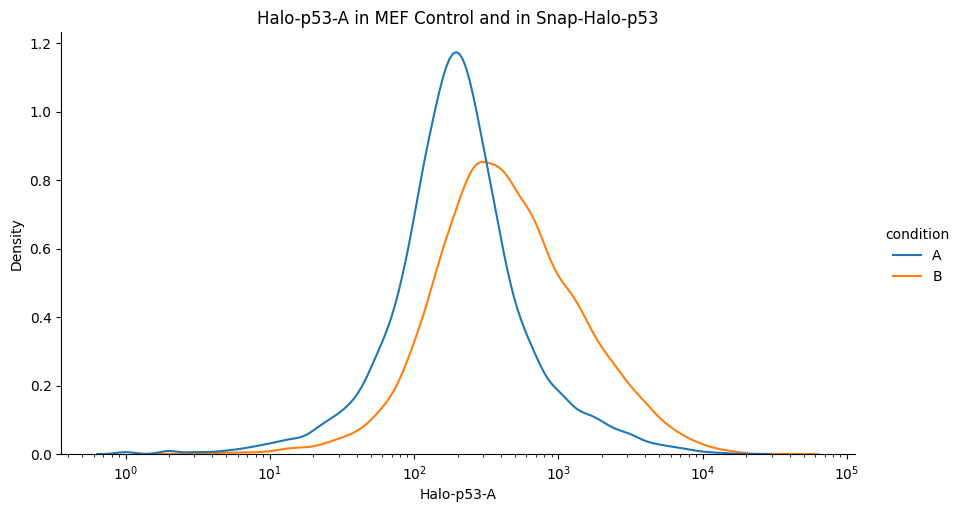

In [43]:
sns.displot(
    data=data[((data.condition == 'A') | (data.condition == 'B')) & (data.cells == 'MEF') & (data['Halo-p53-A'] > 0)], 
    x = 'Halo-p53-A', 
    log_scale=True, 
    kind='kde', 
    hue ='condition', 
    common_norm = False,
    aspect=16/9
    ).set(title='Halo-p53-A in MEF Control and in Snap-Halo-p53')

c:\Users\default.LAPTOP-PE8FD692\OneDrive\Documents\HIP-SAT\data_analysis\pJPT002_transfection\env\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


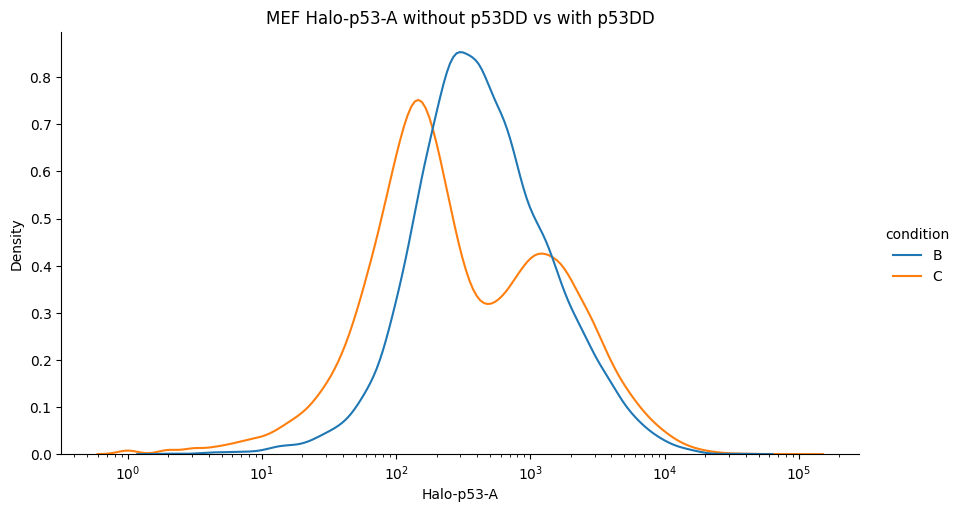

In [41]:
sns.displot(
    data=data[((data.condition == 'B') | (data.condition == 'C')) & (data.cells == 'MEF') & (data['Halo-p53-A'] > 0)], 
    x = 'Halo-p53-A', 
    log_scale=True, 
    kind='kde', 
    hue ='condition', 
    common_norm = False,
    aspect=16/9
    ).set(title='MEF Halo-p53-A without p53DD vs with p53DD')

c:\Users\default.LAPTOP-PE8FD692\OneDrive\Documents\HIP-SAT\data_analysis\pJPT002_transfection\env\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


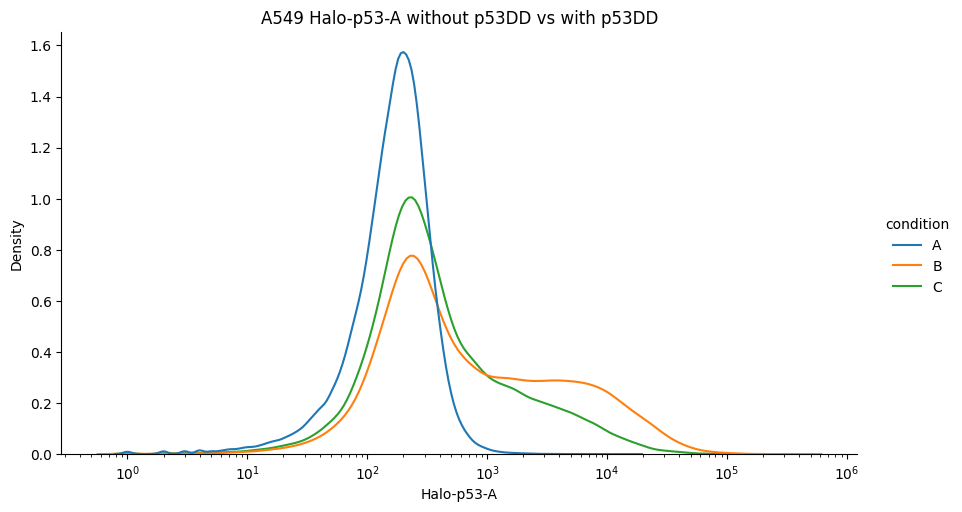

In [44]:
sns.displot(
    data=data[((data.condition == 'A') | (data.condition == 'B') | (data.condition == 'C')) & (data.cells == 'A549') & (data['Halo-p53-A'] > 0)], 
    x = 'Halo-p53-A', 
    log_scale=True, 
    kind='kde', 
    hue ='condition', 
    common_norm = False,
    aspect=16/9
    ).set(title='A549 Halo-p53-A without p53DD vs with p53DD')

In [1]:
sns.displot(
    data=data[(data.condition == 'D') & (data.cells == 'A549') & (data['Halo-p53-A'] > 0)], 
    x = 'Halo-p53-A', 
    log_scale=True, 
    kind='kde', 
    hue ='condition', 
    common_norm = False,
    aspect=16/9
    ).set(title='A549 Halo-p53-A without p53DD vs with p53DD')

NameError: name 'sns' is not defined